[итоговая презентация](https://docs.google.com/presentation/d/1axtNbjEqxZP3QQyIKkEW5ulrgWJHlvaO/edit?usp=sharing&ouid=114535077606061555343&rtpof=true&sd=true)

### Импорт библиотек и опцианальные настройки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
import warnings
import random
warnings.simplefilter('ignore')
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Добавим метод чтобы красиво отобржать текст
from IPython.display import Markdown, display

### Загрузка датасета

In [2]:
flights = pd.read_csv('data 1.csv')

In [3]:
display(flights.head(10))
flights.info()

,flight_id,departure_airport,arrival_airport,actual_departure,actual_arrival,status,departure_city,arriving_city,seats_count,sum_count_ticket,model,proceed,delta_hour
0,136226,AAQ,SVO,2017-01-30T10:08:00Z,2017-01-30T11:48:00Z,Arrived,Anapa,Moscow,130,130,Boeing 737-300,1886000.0,1.666667
1,136316,AAQ,SVO,2017-01-12T10:07:00Z,2017-01-12T11:47:00Z,Arrived,Anapa,Moscow,130,130,Boeing 737-300,1886000.0,1.666667
2,136389,AAQ,SVO,2017-01-18T10:10:00Z,2017-01-18T11:50:00Z,Arrived,Anapa,Moscow,130,129,Boeing 737-300,1873800.0,1.666667
3,136403,AAQ,SVO,2017-02-20T10:06:00Z,2017-02-20T11:46:00Z,Arrived,Anapa,Moscow,130,129,Boeing 737-300,1873800.0,1.666667
4,136423,AAQ,SVO,2017-01-10T10:12:00Z,2017-01-10T11:52:00Z,Arrived,Anapa,Moscow,130,129,Boeing 737-300,1849400.0,1.666667
5,136441,AAQ,SVO,2017-02-03T10:07:00Z,2017-02-03T11:47:00Z,Arrived,Anapa,Moscow,130,128,Boeing 737-300,1837200.0,1.666667
6,136275,AAQ,SVO,2017-01-13T10:08:00Z,2017-01-13T11:46:00Z,Arrived,Anapa,Moscow,130,125,Boeing 737-300,1825000.0,1.633333
7,136131,AAQ,SVO,2017-01-28T10:07:00Z,2017-01-28T11:46:00Z,Arrived,Anapa,Moscow,130,124,Boeing 737-300,1812800.0,1.650000
8,136436,AAQ,SVO,2017-01-26T10:08:00Z,2017-01-26T11:47:00Z,Arrived,Anapa,Moscow,130,124,Boeing 737-300,1811600.0,1.650000
9,136249,AAQ,SVO,2017-02-14T10:08:00Z,2017-02-14T11:46:00Z,Arrived,Anapa,Moscow,130,123,Boeing 737-300,1800600.0,1.633333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flight_id          118 non-null    int64  
 1   departure_airport  118 non-null    object 
 2   arrival_airport    118 non-null    object 
 3   actual_departure   118 non-null    object 
 4   actual_arrival     118 non-null    object 
 5   status             118 non-null    object 
 6   departure_city     118 non-null    object 
 7   arriving_city      118 non-null    object 
 8   seats_count        118 non-null    int64  
 9   sum_count_ticket   118 non-null    int64  
 10  model              118 non-null    object 
 11  proceed            118 non-null    float64
 12  delta_hour         118 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 12.1+ KB


###### в датасете седержится информация по 118 рейсам
- flight_id - id рейса
- departure_airport - аэропорт отлета
- arrival_airport - аэропорт прилета
- actual_departure - время вылета
- actual_arrival - время прилета
- status - статус ркйса
- departure_city - город вылета (у нас только Анапа)
- arriving_city - город прибытия
- seats_count - количество мест в самолете
- sum_count_ticket - количество купленных билетов
- model - модель самолета
- proceed - суммарная цена всех билетов рейса
- delta_hour - длительность полета (в часах)

In [4]:
flights['delta_hour']=round(flights['delta_hour'],2) #округлим часы, для удобства

In [5]:
flights.arriving_city.value_counts()

Moscow      59
Belgorod    59
Name: arriving_city, dtype: int64

#### в датасете только два города с одинаковым количеством рейсов

In [6]:
flights.model.value_counts()

Boeing 737-300         59
Sukhoi Superjet-100    59
Name: model, dtype: int64

#### и им соответствуют 2 иодели самолета

In [10]:
flights.arrival_airport.value_counts()

SVO    59
EGO    59
Name: arrival_airport, dtype: int64

#### и 2 аэропорта

#### добавим информацию по расходу топлива и цене на него: Sukhoi Superjet-100 - 1700кг\ч , Boeing 737-300 - 2400кг\ч

In [11]:
def fuel(df):
    if df == 'Sukhoi Superjet-100':
        return 1700
    elif df == 'Boeing 737-300':
        return 2400

flights['fuel']=flights.model.apply(fuel)
flights.head(5)

,flight_id,departure_airport,arrival_airport,actual_departure,actual_arrival,status,departure_city,arriving_city,seats_count,sum_count_ticket,model,proceed,delta_hour,fuel
0,136226,AAQ,SVO,2017-01-30T10:08:00Z,2017-01-30T11:48:00Z,Arrived,Anapa,Moscow,130,130,Boeing 737-300,1886000.0,1.67,2400
1,136316,AAQ,SVO,2017-01-12T10:07:00Z,2017-01-12T11:47:00Z,Arrived,Anapa,Moscow,130,130,Boeing 737-300,1886000.0,1.67,2400
2,136389,AAQ,SVO,2017-01-18T10:10:00Z,2017-01-18T11:50:00Z,Arrived,Anapa,Moscow,130,129,Boeing 737-300,1873800.0,1.67,2400
3,136403,AAQ,SVO,2017-02-20T10:06:00Z,2017-02-20T11:46:00Z,Arrived,Anapa,Moscow,130,129,Boeing 737-300,1873800.0,1.67,2400
4,136423,AAQ,SVO,2017-01-10T10:12:00Z,2017-01-10T11:52:00Z,Arrived,Anapa,Moscow,130,129,Boeing 737-300,1849400.0,1.67,2400


In [12]:
#переведем дату в удобный формат
flights.actual_arrival=pd.to_datetime(flights['actual_arrival'])
flights.actual_departure=pd.to_datetime(flights['actual_departure'])

In [13]:
#присвоим корректную цену на топливо по месяцам
def price(df):
    if df.month==1:
        return 41435
    elif df.month==2:
        return 39553
    elif df.month==12:
        return 47101

flights['price']=flights.actual_arrival.apply(price)
flights.sample(5)

,flight_id,departure_airport,arrival_airport,actual_departure,actual_arrival,status,departure_city,arriving_city,seats_count,sum_count_ticket,model,proceed,delta_hour,fuel,price
75,136586,AAQ,EGO,2017-01-10 09:28:00+00:00,2017-01-10 10:18:00+00:00,Arrived,Anapa,Belgorod,97,96,Sukhoi Superjet-100,759000.0,0.83,1700,41435
72,136900,AAQ,EGO,2017-02-01 09:30:00+00:00,2017-02-01 10:21:00+00:00,Arrived,Anapa,Belgorod,97,97,Sukhoi Superjet-100,765300.0,0.85,1700,39553
51,136202,AAQ,SVO,2017-01-05 10:07:00+00:00,2017-01-05 11:49:00+00:00,Arrived,Anapa,Moscow,130,100,Boeing 737-300,1495600.0,1.70,2400,41435
4,136423,AAQ,SVO,2017-01-10 10:12:00+00:00,2017-01-10 11:52:00+00:00,Arrived,Anapa,Moscow,130,129,Boeing 737-300,1849400.0,1.67,2400,41435
36,136411,AAQ,SVO,2017-02-04 10:06:00+00:00,2017-02-04 11:46:00+00:00,Arrived,Anapa,Moscow,130,110,Boeing 737-300,1590800.0,1.67,2400,39553


In [14]:
# стоймость топлива на каждый перелет
flights['fuel_cost']=round((flights['delta_hour']*flights['price']*flights['fuel']/1000),2)
flights.sample(5)

,flight_id,departure_airport,arrival_airport,actual_departure,actual_arrival,status,departure_city,arriving_city,seats_count,sum_count_ticket,model,proceed,delta_hour,fuel,price,fuel_cost
12,136348,AAQ,SVO,2017-02-10 10:05:00+00:00,2017-02-10 11:45:00+00:00,Arrived,Anapa,Moscow,130,120,Boeing 737-300,1762800.0,1.67,2400,39553,158528.42
6,136275,AAQ,SVO,2017-01-13 10:08:00+00:00,2017-01-13 11:46:00+00:00,Arrived,Anapa,Moscow,130,125,Boeing 737-300,1825000.0,1.63,2400,41435,162093.72
35,136452,AAQ,SVO,2017-02-17 10:08:00+00:00,2017-02-17 11:48:00+00:00,Arrived,Anapa,Moscow,130,109,Boeing 737-300,1603000.0,1.67,2400,39553,158528.42
108,136678,AAQ,EGO,2017-01-28 09:27:00+00:00,2017-01-28 10:17:00+00:00,Arrived,Anapa,Belgorod,97,80,Sukhoi Superjet-100,631200.0,0.83,1700,41435,58464.78
10,136463,AAQ,SVO,2017-01-20 10:06:00+00:00,2017-01-20 11:45:00+00:00,Arrived,Anapa,Moscow,130,122,Boeing 737-300,1788400.0,1.65,2400,41435,164082.60


In [15]:
# разница между стоймостью билетов и стоймостью топлива
flights['delta_cost']=flights['proceed']-flights['fuel_cost']

In [16]:
flights.sort_values(by='delta_cost')

,flight_id,departure_airport,arrival_airport,actual_departure,actual_arrival,status,departure_city,arriving_city,seats_count,sum_count_ticket,model,proceed,delta_hour,fuel,price,fuel_cost,delta_cost
116,136642,AAQ,EGO,2017-01-30 09:28:00+00:00,2017-01-30 10:17:00+00:00,Arrived,Anapa,Belgorod,97,64,Sukhoi Superjet-100,531000.0,0.82,1700,41435,57760.39,473239.61
117,136807,AAQ,EGO,2017-02-23 09:28:00+00:00,2017-02-23 10:18:00+00:00,Arrived,Anapa,Belgorod,97,68,Sukhoi Superjet-100,531000.0,0.83,1700,39553,55809.28,475190.72
115,136844,AAQ,EGO,2017-02-28 09:26:00+00:00,2017-02-28 10:16:00+00:00,Arrived,Anapa,Belgorod,97,79,Sukhoi Superjet-100,575100.0,0.83,1700,39553,55809.28,519290.72
114,136887,AAQ,EGO,2017-01-20 09:30:00+00:00,2017-01-20 10:19:00+00:00,Arrived,Anapa,Belgorod,97,78,Sukhoi Superjet-100,595200.0,0.82,1700,41435,57760.39,537439.61
113,136922,AAQ,EGO,2017-02-11 09:27:00+00:00,2017-02-11 10:17:00+00:00,Arrived,Anapa,Belgorod,97,76,Sukhoi Superjet-100,607800.0,0.83,1700,39553,55809.28,551990.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,136423,AAQ,SVO,2017-01-10 10:12:00+00:00,2017-01-10 11:52:00+00:00,Arrived,Anapa,Moscow,130,129,Boeing 737-300,1849400.0,1.67,2400,41435,166071.48,1683328.52
2,136389,AAQ,SVO,2017-01-18 10:10:00+00:00,2017-01-18 11:50:00+00:00,Arrived,Anapa,Moscow,130,129,Boeing 737-300,1873800.0,1.67,2400,41435,166071.48,1707728.52
3,136403,AAQ,SVO,2017-02-20 10:06:00+00:00,2017-02-20 11:46:00+00:00,Arrived,Anapa,Moscow,130,129,Boeing 737-300,1873800.0,1.67,2400,39553,158528.42,1715271.58
1,136316,AAQ,SVO,2017-01-12 10:07:00+00:00,2017-01-12 11:47:00+00:00,Arrived,Anapa,Moscow,130,130,Boeing 737-300,1886000.0,1.67,2400,41435,166071.48,1719928.52


#### 5 самых малоприбыльных рейса - flight_id = 136642, 136807, 136844, 136887,136922, направление - Белгород

<AxesSubplot:xlabel='arriving_city', ylabel='delta_cost'>

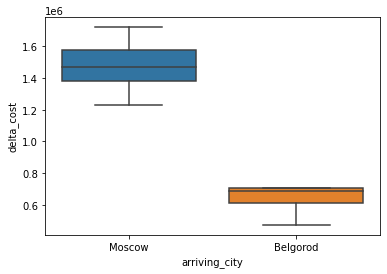

In [17]:
sns.boxplot(x='arriving_city', y='delta_cost', data = flights)

In [18]:
# суммарная прибыль от вылетов по городам
flights_city=flights.copy()
flights_city=flights_city.pivot_table(values=['delta_cost'],index=['arriving_city'],aggfunc='sum',fill_value = 0)
flights_city

,delta_cost
arriving_city,
Belgorod,38526831.93
Moscow,87355454.58


In [20]:
# колонка по дням недели и месяцам
flights['day_of_week']=flights['actual_arrival'].dt.dayofweek
flights['month']=flights['actual_arrival'].dt.month
flights

,flight_id,departure_airport,arrival_airport,actual_departure,actual_arrival,status,departure_city,arriving_city,seats_count,sum_count_ticket,model,proceed,delta_hour,fuel,price,fuel_cost,delta_cost,day_of_week,month
0,136226,AAQ,SVO,2017-01-30 10:08:00+00:00,2017-01-30 11:48:00+00:00,Arrived,Anapa,Moscow,130,130,Boeing 737-300,1886000.0,1.67,2400,41435,166071.48,1719928.52,0,1
1,136316,AAQ,SVO,2017-01-12 10:07:00+00:00,2017-01-12 11:47:00+00:00,Arrived,Anapa,Moscow,130,130,Boeing 737-300,1886000.0,1.67,2400,41435,166071.48,1719928.52,3,1
2,136389,AAQ,SVO,2017-01-18 10:10:00+00:00,2017-01-18 11:50:00+00:00,Arrived,Anapa,Moscow,130,129,Boeing 737-300,1873800.0,1.67,2400,41435,166071.48,1707728.52,2,1
3,136403,AAQ,SVO,2017-02-20 10:06:00+00:00,2017-02-20 11:46:00+00:00,Arrived,Anapa,Moscow,130,129,Boeing 737-300,1873800.0,1.67,2400,39553,158528.42,1715271.58,0,2
4,136423,AAQ,SVO,2017-01-10 10:12:00+00:00,2017-01-10 11:52:00+00:00,Arrived,Anapa,Moscow,130,129,Boeing 737-300,1849400.0,1.67,2400,41435,166071.48,1683328.52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,136922,AAQ,EGO,2017-02-11 09:27:00+00:00,2017-02-11 10:17:00+00:00,Arrived,Anapa,Belgorod,97,76,Sukhoi Superjet-100,607800.0,0.83,1700,39553,55809.28,551990.72,5,2
114,136887,AAQ,EGO,2017-01-20 09:30:00+00:00,2017-01-20 10:19:00+00:00,Arrived,Anapa,Belgorod,97,78,Sukhoi Superjet-100,595200.0,0.82,1700,41435,57760.39,537439.61,4,1
115,136844,AAQ,EGO,2017-02-28 09:26:00+00:00,2017-02-28 10:16:00+00:00,Arrived,Anapa,Belgorod,97,79,Sukhoi Superjet-100,575100.0,0.83,1700,39553,55809.28,519290.72,1,2
116,136642,AAQ,EGO,2017-01-30 09:28:00+00:00,2017-01-30 10:17:00+00:00,Arrived,Anapa,Belgorod,97,64,Sukhoi Superjet-100,531000.0,0.82,1700,41435,57760.39,473239.61,0,1


<AxesSubplot:xlabel='day_of_week', ylabel='delta_cost'>

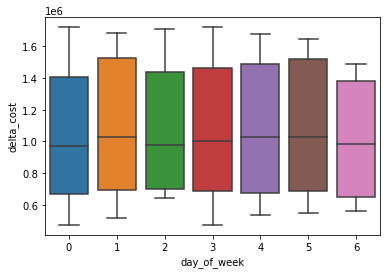

In [21]:
sns.boxplot(x='day_of_week', y='delta_cost', data = flights)

<AxesSubplot:xlabel='month', ylabel='delta_cost'>

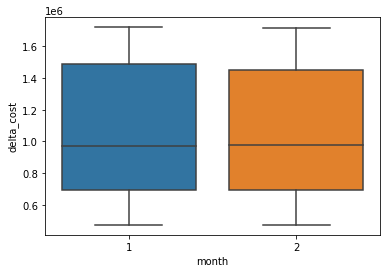

In [22]:
sns.boxplot(x='month', y='delta_cost', data = flights)

судя по графикам на прибыль влияет город прилета, день недели и месяц не имеют значения

In [23]:
# процент заполнения самолета
flights['fullness']=round((flights['sum_count_ticket']*100/flights['seats_count']),1)
flights.sample(5)

,flight_id,departure_airport,arrival_airport,actual_departure,actual_arrival,status,departure_city,arriving_city,seats_count,sum_count_ticket,model,proceed,delta_hour,fuel,price,fuel_cost,delta_cost,day_of_week,month,fullness
67,136841,AAQ,EGO,2017-02-07 09:25:00+00:00,2017-02-07 10:16:00+00:00,Arrived,Anapa,Belgorod,97,97,Sukhoi Superjet-100,765300.0,0.85,1700,39553,57154.08,708145.92,1,2,100.0
72,136900,AAQ,EGO,2017-02-01 09:30:00+00:00,2017-02-01 10:21:00+00:00,Arrived,Anapa,Belgorod,97,97,Sukhoi Superjet-100,765300.0,0.85,1700,39553,57154.08,708145.92,2,2,100.0
60,136605,AAQ,EGO,2017-02-15 09:28:00+00:00,2017-02-15 10:19:00+00:00,Arrived,Anapa,Belgorod,97,97,Sukhoi Superjet-100,765300.0,0.85,1700,39553,57154.08,708145.92,2,2,100.0
10,136463,AAQ,SVO,2017-01-20 10:06:00+00:00,2017-01-20 11:45:00+00:00,Arrived,Anapa,Moscow,130,122,Boeing 737-300,1788400.0,1.65,2400,41435,164082.60,1624317.40,4,1,93.8
16,136132,AAQ,SVO,2017-02-15 10:09:00+00:00,2017-02-15 11:48:00+00:00,Arrived,Anapa,Moscow,130,116,Boeing 737-300,1714000.0,1.65,2400,39553,156629.88,1557370.12,2,2,89.2


<AxesSubplot:xlabel='day_of_week', ylabel='fullness'>

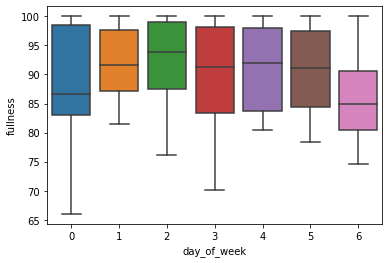

In [24]:
sns.boxplot(x='day_of_week', y='fullness', data = flights)

<AxesSubplot:xlabel='arriving_city', ylabel='fullness'>

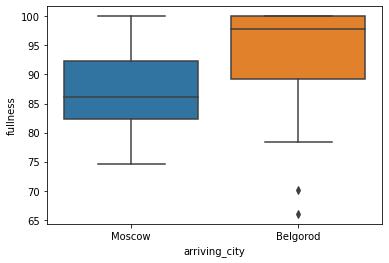

In [25]:
sns.boxplot(x='arriving_city', y='fullness', data = flights)

<AxesSubplot:xlabel='month', ylabel='fullness'>

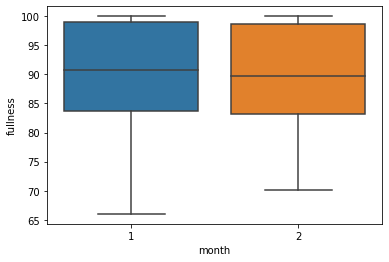

In [26]:
sns.boxplot(x='month', y='fullness', data = flights)

In [27]:
flights.sort_values(by='fullness')

,flight_id,departure_airport,arrival_airport,actual_departure,actual_arrival,status,departure_city,arriving_city,seats_count,sum_count_ticket,model,proceed,delta_hour,fuel,price,fuel_cost,delta_cost,day_of_week,month,fullness
116,136642,AAQ,EGO,2017-01-30 09:28:00+00:00,2017-01-30 10:17:00+00:00,Arrived,Anapa,Belgorod,97,64,Sukhoi Superjet-100,531000.0,0.82,1700,41435,57760.39,473239.61,0,1,66.0
117,136807,AAQ,EGO,2017-02-23 09:28:00+00:00,2017-02-23 10:18:00+00:00,Arrived,Anapa,Belgorod,97,68,Sukhoi Superjet-100,531000.0,0.83,1700,39553,55809.28,475190.72,3,2,70.1
56,136122,AAQ,SVO,2017-01-08 10:08:00+00:00,2017-01-08 11:48:00+00:00,Arrived,Anapa,Moscow,130,97,Boeing 737-300,1431000.0,1.67,2400,41435,166071.48,1264928.52,6,1,74.6
54,136360,AAQ,SVO,2017-02-05 10:08:00+00:00,2017-02-05 11:48:00+00:00,Arrived,Anapa,Moscow,130,97,Boeing 737-300,1455400.0,1.67,2400,39553,158528.42,1296871.58,6,2,74.6
57,136250,AAQ,SVO,2017-02-08 10:06:00+00:00,2017-02-08 11:47:00+00:00,Arrived,Anapa,Moscow,130,99,Boeing 737-300,1407800.0,1.68,2400,39553,159477.70,1248322.30,2,2,76.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,136871,AAQ,EGO,2017-01-13 09:28:00+00:00,2017-01-13 10:18:00+00:00,Arrived,Anapa,Belgorod,97,97,Sukhoi Superjet-100,765300.0,0.83,1700,41435,58464.78,706835.22,4,1,100.0
71,136875,AAQ,EGO,2017-02-16 09:29:00+00:00,2017-02-16 10:19:00+00:00,Arrived,Anapa,Belgorod,97,97,Sukhoi Superjet-100,765300.0,0.83,1700,39553,55809.28,709490.72,3,2,100.0
72,136900,AAQ,EGO,2017-02-01 09:30:00+00:00,2017-02-01 10:21:00+00:00,Arrived,Anapa,Belgorod,97,97,Sukhoi Superjet-100,765300.0,0.85,1700,39553,57154.08,708145.92,2,2,100.0
66,136827,AAQ,EGO,2017-02-18 09:26:00+00:00,2017-02-18 10:17:00+00:00,Arrived,Anapa,Belgorod,97,97,Sukhoi Superjet-100,765300.0,0.85,1700,39553,57154.08,708145.92,5,2,100.0


In [28]:
flights_Moscow=flights.copy()
flights_Belgorod=flights.copy()
flights_Moscow=flights_Moscow[flights_Moscow.arriving_city == 'Moscow']
flights_Belgorod=flights_Belgorod[flights_Belgorod.arriving_city == 'Belgorod']

<AxesSubplot:xlabel='flight_id', ylabel='delta_cost'>

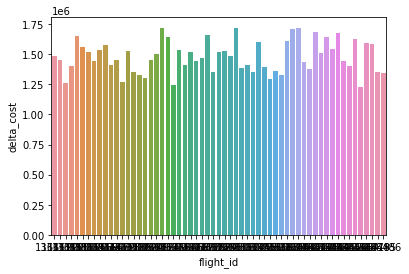

In [29]:
sns.barplot(x='flight_id', y='delta_cost', data = flights_Moscow)

<AxesSubplot:xlabel='flight_id', ylabel='delta_cost'>

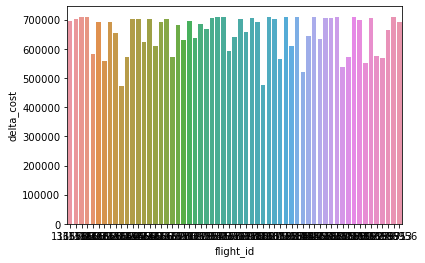

In [30]:
sns.barplot(x='flight_id', y='delta_cost', data = flights_Belgorod)

In [40]:
flights_corr=flights.copy()
flights_corr.drop(['flight_id','fuel','day_of_week','proceed','month','fuel_cost',
                   'seats_count','price'], axis = 1, inplace=True)

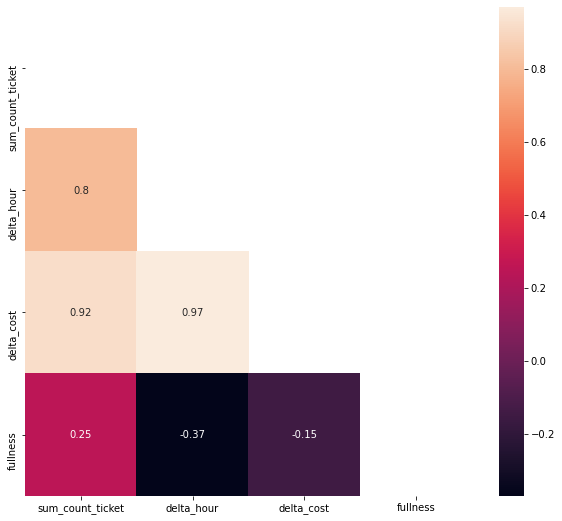

In [41]:
quantitative_features = flights_corr.select_dtypes(include='number').columns
corr_matrix = flights_corr[quantitative_features].corr().round(2)
plt.rcParams['figure.figsize'] = (10, 9)
matrix =  np.triu(corr_matrix)
x = sns.heatmap(corr_matrix, mask=matrix, annot=True)

In [42]:
flights_corr.corr()

,sum_count_ticket,delta_hour,delta_cost,fullness
sum_count_ticket,1.000000,0.802788,0.916993,0.250206
delta_hour,0.802788,1.000000,0.967828,-0.368904
delta_cost,0.916993,0.967828,1.000000,-0.153734
fullness,0.250206,-0.368904,-0.153734,1.000000


Все переменные, кроме 'fullness', линейно зависимы, возможно, для анализа будут полеpны дополнительные данные, такие как:
* пол и возрас пассажиров
* изношенность самолета(год выпуска)
* информация о бортперсонале (количество, заработная плата)
* информация о стоймости нахождения самолета в аэропорту и длительность нахождения в аэропорту

